In [1]:
import import_ipynb
import GlobalVariables as common

In [2]:
#user input of some of the variables
common.numberOfHouseholds = 100# int(input("Insert the number of household to create: "))
common.percentageOfNumbAgents = 50# int(input("Insert the percentage of numb agents (from 0 to 100):"))
common.numberOfFirms = 4# int(input("Insert the number of firms to create: "))
common.numberOfCycles = 300# int(input("Insert the number of cycles:"))
common.seed =99# int(input("Insert a seed for random values:"))
common.verbose =False# eval(input("Verbose (True or False):"))
common.network =1# eval(input("Do you want to create a network between the households (True or False):"))
if common.network: 
    common.probabilityOfConnection = 0.15 #float(input("Probability of connection in the network:"))
    
common.unemployment = 1 # eval(input("Do you want to introduce the unemployment modelling:"))

In [3]:
from Environment import *
from Firms import *
from Household import *
from Book import *

if common.unemployment:
    from ActionsU import *
else:
    from Actions import *

In [4]:
#setting the seed
np.random.seed(seed = common.seed)

In [5]:
# first, creating the environment
environment = Environment()

In [6]:
#then we create the Agents
environment.createAgent("Household", common.numberOfHouseholds)
environment.createAgent("Firm", common.numberOfFirms)
if common.verbose:
    print("Global interest rate for the next cycle is:", common.currentInterestRate)

In [7]:
#if there's a social network
if common.network:
    environment.createBaseGraph()
    #environment.drawBaseGraph(l = 55, h=34, pos = "circular")

In [8]:
#the scheduled actions are done
for cycle in range(common.numberOfCycles):
    environment.cycle( urlOfTheDailySchedule = common.urlOfTheDailySchedule)

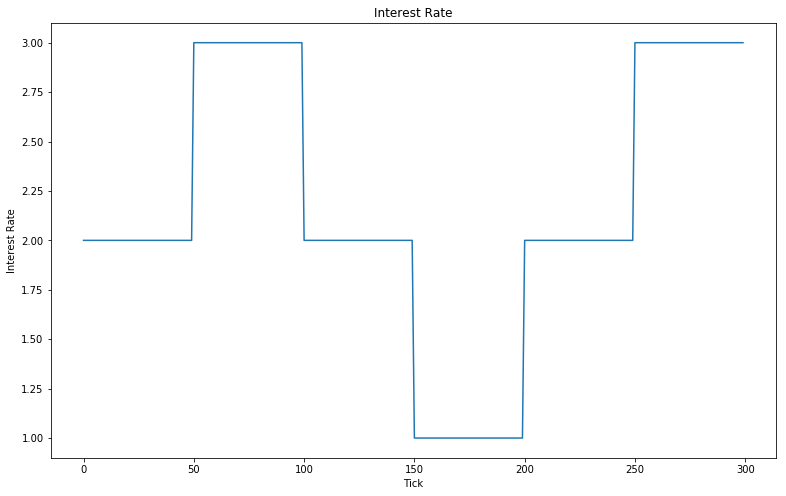

In [9]:
#ir section
environment.plotOfInterestRate()

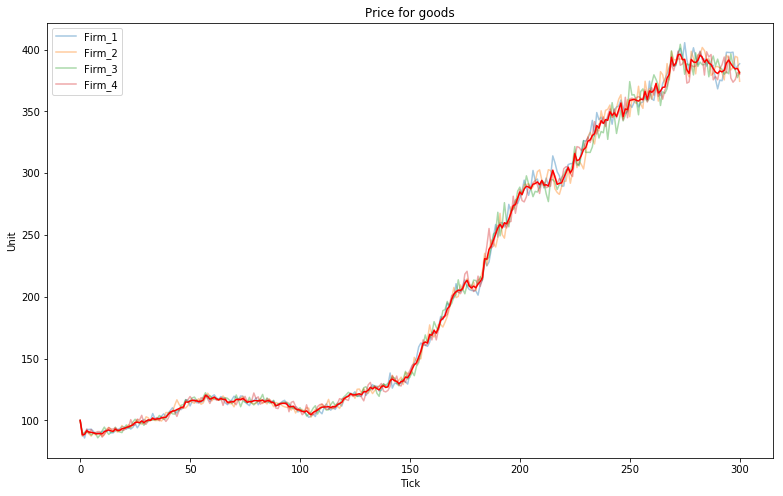

In [10]:
environment.plotOfPriceForGoods()

In [11]:
#environment.PriceForGoodsHistogram()

/home/gabriele/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/gabriele/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/gabriele/.conda/envs/py35/lib/pyth

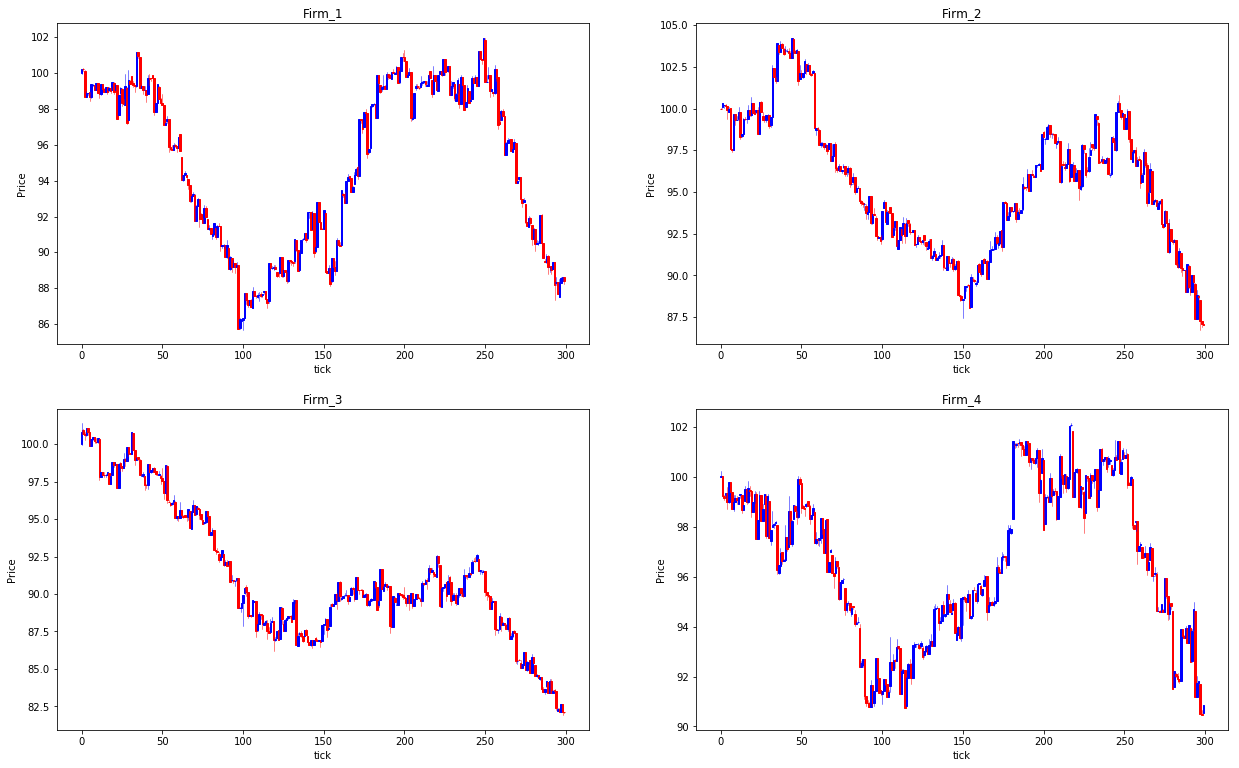

In [12]:
environment.candlestickForShares()